<a href="https://colab.research.google.com/github/jerekorhonenn/ML-Course/blob/main/No_code_Introduction_to_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

Our goal is to help a shopping mall with clustering their customers in segments, so that they can create targeting makreting campaigns.

Download dataset [here](https://drive.google.com/file/d/1rjPGY1DsDm15vg2zRERLqXaZQ3z8mBOA/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset exploration

In [ ]:
data = pd.read_csv("customers_Data.csv")

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Dataset preprocessing

In [ ]:
# Removing unwanted column
new_data = data.drop("CustomerID", axis=1)

In [ ]:
# Encoding Gender column
new_data['Genre'] = np.where(new_data['Genre'] == 'Male', 1, 0)

In [ ]:
new_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Applying clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)    

In [ ]:
km.fit(new_data)

KMeans(n_clusters=3)

In [ ]:
km.inertia_

143391.59236035676

## Finding optimal number of clusters

In [ ]:
in_cluster_distance = []

K = list(range(1, 11))
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(new_data)
    in_cluster_distance.append(km.inertia_)

In [ ]:
in_cluster_distance

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75412.59682443162,
 58362.95546871428,
 51201.740785418944,
 44359.634641148325,
 40937.28514948874,
 37391.42987012987]

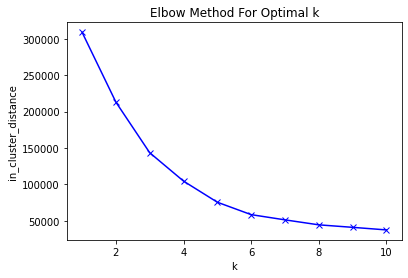

In [ ]:
plt.plot(K, in_cluster_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('in_cluster_distance')
plt.title('Elbow Method For Optimal k')
plt.show()

## Training optimal KMeans


In [ ]:
km_new = KMeans(n_clusters=6)

In [ ]:
km_new.fit(new_data)

KMeans(n_clusters=6)

In [ ]:
preds = km_new.predict(new_data)

In [ ]:
preds

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 3,
       4, 5, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)